# PISA 2012 Analysis
## by John Platter

## Preliminary Wrangling

The PISA 2012 is a massive standardized test of Reading, Science and Math given to 15 year old students across 66 different countries. The data also includes a thorough survey of more than 400 attributes that may be used to find interesting correlations. 

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [ ]:
df=pd.read_csv('pisa2012.csv', encoding = "ISO-8859-1", low_memory=False)

In [4]:
#read all the entries of the pisadict to sift through the interesting ones
df_key=pd.read_csv('pisadict2012.csv',
                   encoding = "ISO-8859-1",
                   skiprows=1,
                   names=['code','explanation'],
                   index_col='code')
for k in df_key.index:
    print(k, df_key.loc[k, 'explanation'])

CNT Country code 3-character
SUBNATIO Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
STRATUM Stratum ID 7-character (cnt + region ID + original stratum ID)
OECD OECD country
NC National Centre 6-digit Code
SCHOOLID School ID 7-digit (region ID + stratum ID + 3-digit school ID)
STIDSTD Student ID
ST01Q01 International Grade
ST02Q01 National Study Programme
ST03Q01 Birth - Month
ST03Q02 Birth -Year
ST04Q01 Gender
ST05Q01 Attend <ISCED 0>
ST06Q01 Age at <ISCED 1>
ST07Q01 Repeat - <ISCED 1>
ST07Q02 Repeat - <ISCED 2>
ST07Q03 Repeat - <ISCED 3>
ST08Q01 Truancy - Late for School
ST09Q01 Truancy - Skip whole school day
ST115Q01 Truancy - Skip classes within school day
ST11Q01 At Home - Mother
ST11Q02 At Home - Father
ST11Q03 At Home - Brothers
ST11Q04 At Home - Sisters
ST11Q05 At Home - Grandparents
ST11Q06 At Home - Others
ST13Q01 Mother<Highest Schooling>
ST14Q01 Mother Qualifications - <ISCED level 6>
ST14Q02 Mother Qualifications - <ISCED level 5A

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


In [6]:
df_key.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635 entries, CNT to VER_STU
Data columns (total 1 columns):
explanation    635 non-null object
dtypes: object(1)
memory usage: 29.9+ KB


In [7]:
my_interests="""CNT
GRADE
CLCUSE1
ST08Q01
ST09Q01
ST115Q01
ST35Q04
ST42Q02
ST43Q01
ST49Q02
ST85Q02
ST88Q01
ST88Q04
ST89Q05
ST91Q01
IC09Q06

ST69Q02
ST70Q02
ST71Q01
WEALTH

W_FSTUWT
PV1MATH
PV2MATH
PV3MATH
PV4MATH
PV5MATH""".replace('\n\n','\n').replace('\n',' ').split(' ')
for code in my_interests:
    print(code+":", df_key.T[code][0])

CNT: Country code 3-character
GRADE: Grade compared to modal grade in country
CLCUSE1: Calculator Use
ST08Q01: Truancy - Late for School
ST09Q01: Truancy - Skip whole school day
ST115Q01: Truancy - Skip classes within school day
ST35Q04: Subjective Norms - Parents Believe Studying Mathematics Is Important
ST42Q02: Math Self-Concept - Not Good at Maths
ST43Q01: Perceived Control - Can Succeed with Enough Effort
ST49Q02: Math Behaviour - Help Friends with Maths
ST85Q02: Classroom Management - Teacher Keeps Class Orderly
ST88Q01: Attitude towards School - Does Little to Prepare Me for Life
ST88Q04: Attitude towards School- Useful for Job
ST89Q05: Attitude toward School - Trying Hard is Important
ST91Q01: Perceived Control - Can Succeed with Enough Effort
IC09Q06: Out-of-school 9 - Homework
ST69Q02: Min in <class period> - <Maths>
ST70Q02: No of <class period> p/wk - <Maths>
ST71Q01: No of ALL <class period> a week
WEALTH: Wealth
W_FSTUWT: FINAL STUDENT WEIGHT
PV1MATH: Plausible value 1 in

### What is the structure of your dataset?

> The data comes in two parts - the main file, pisa2012.csv has the student responses across 636 columns. The column descriptions are coded. The other file, pisadict2012.csv, contains a dictionary of the full descriptions of the columns in pisa2012. 

> There is one important feature of the dataset that I began to address in this project. Each row is given a weight, essentially dictating how many students each row represents within the dataset. For the first few weeks I worked to include this into my analysis, as analysis that does not take the student weight into account will be inaccurate, but as I progressed, the weights became more and more unwieldy to work with and it was clear I was going beyond the scope of this project/course. Pandas, seaborn and matplotlib are sorely unequipped to work with weighted data with the same ease as the all the unweighted datasets we practiced on in the Nanodegree. I will be sure to clarify in the project below where I shifted from analysis that included the weights to analysis that ignored the weights as I was advised to do in the discussion of this topic in the Udacity Knowledge center.

### What is/are the main feature(s) of interest in your dataset?

> Since there are so many attributes to choose from in the dataset, I narrowed my focus to a bunch of categorical survey type questions, 3 numerical survey questions, and the student math scores. I am a math teacher, so the features in the survey questions that caught my attention include:
- CNT: Country code 3-character
- GRADE: Grade compared to modal grade in country
- CLCUSE1: Calculator Use
- ST08Q01: Truancy - Late for School
- ST09Q01: Truancy - Skip whole school day
- ST115Q01: Truancy - Skip classes within school day
- ST35Q04: Subjective Norms - Parents Believe Studying Mathematics Is Important
- ST42Q02: Math Self-Concept - Not Good at Maths
- ST43Q01: Perceived Control - Can Succeed with Enough Effort
- ST49Q02: Math Behaviour - Help Friends with Maths
- ST85Q02: Classroom Management - Teacher Keeps Class Orderly
- ST88Q01: Attitude towards School - Does Little to Prepare Me for Life
- ST88Q04: Attitude towards School- Useful for Job
- ST89Q05: Attitude toward School - Trying Hard is Important
- ST91Q01: Perceived Control - Can Succeed with Enough Effort
- IC09Q06: Out-of-school 9 - Homework
- ST69Q02: Min in class period - Maths
- ST70Q02: No of class period p/wk - Maths
- ST71Q01: No of ALL class period a week
- WEALTH: Wealth
- W_FSTUWT: FINAL STUDENT WEIGHT
- PV1MATH: Plausible value 1 in mathematics
- PV2MATH: Plausible value 2 in mathematics
- PV3MATH: Plausible value 3 in mathematics
- PV4MATH: Plausible value 4 in mathematics
- PV5MATH: Plausible value 5 in mathematics

I would love to see how some of these responses in the survey questions seemed to affect student acheivement in math, if any. I am also curious specifically about math achievement in the USA vs Finland, since Finland's unprecedented educational success is a hot topic in the education field right now.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> It will be important to compare the distribution of each of the categorical questions and how they relate to achievement in the US, Finland, and the World. I suspect there will be different math achievement means for each of the categorical responses - some affect observed on achievement in each of the category. Based on my own experience as a math teacher, I suspect that the strongest corellation with achievement will be with one of the numerical variables I selected, Wealth. Kids with safe, comfortable, less-stressful homes definitely learn better, so I would be very surprised if wealth didn't have a positive effect on student achievement.

# Univariate Exploration

In [8]:
#create a df focusing on the interests I have articulated above
interest_subset=df[my_interests].copy()
#any categorical data that is missing should show a new category "No Response"
interest_subset.loc[:, 'CLCUSE1':'IC09Q06']=interest_subset.loc[:, 'CLCUSE1':'IC09Q06'].fillna('No Response')


It is important to note that there are many missing values in the numerical variables. These will need to be dealt with later on, as I don't want to drop all rows with missing numerical data just yet.

In [9]:
# A few columns need to become strings before becoming categorical types
interest_subset.GRADE=interest_subset.GRADE.astype(str)
interest_subset.ST115Q01=interest_subset.ST115Q01.astype(str) 
# Order all the categorical types with a dictionary

end_categorical=list(interest_subset.columns).index('IC09Q06')
for i in interest_subset.columns[1:end_categorical]:
    print(i,'\n', interest_subset[i].value_counts().index.values)
#the following method of ordering categories was yoinked and 
#repurposed from the Udacity's diamond project example
ordinal_var_dict={'GRADE': ['-3.0','-2.0','-1.0', '0.0','1.0','2.0','3.0','No Response'],
                  'CLCUSE1': ['No calculator','A Simple calculator','A Scientific calculator',
                             'A Graphics calculator','A CAS calculator','No Response'],
                  'ST08Q01': ['None  ','One or two times  ','Three or four times  ',
                              'Five or more times  ','No Response'],
                  'ST09Q01': ['None  ','One or two times  ','Three or four times  ',
                              'Five or more times  ','No Response'],
                  'ST115Q01': ['1.0', '2.0', '3.0', '4.0', 'No Response'],
                  'ST35Q04': ['Strongly disagree','Disagree','Agree','Strongly agree','No Response'],
                  'ST42Q02': ['Strongly disagree','Disagree','Agree','Strongly agree','No Response'],
                  'ST43Q01': ['Strongly disagree','Disagree','Agree','Strongly agree','No Response'],
                  'ST49Q02': ['Never or rarely','Sometimes','Often','Always or almost always','No Response'],
                  'ST85Q02': ['Strongly disagree','Disagree','Agree','Strongly agree','No Response'],
                  'ST88Q01': ['Strongly disagree','Disagree','Agree','Strongly agree','No Response'],
                  'ST88Q04': ['Strongly disagree','Disagree','Agree','Strongly agree','No Response'],
                  'ST89Q05': ['Strongly disagree','Disagree','Agree','Strongly agree','No Response'],
                  'ST91Q01': ['Strongly disagree','Disagree','Agree','Strongly agree','No Response']
                 }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    interest_subset[var] = interest_subset[var].astype(ordered_var)

GRADE 
 ['0.0' '-1.0' '1.0' '-2.0' '-3.0' '2.0' 'nan' '3.0']
CLCUSE1 
 ['A Simple calculator' 'A Scientific calculator' 'No Response'
 'No calculator' 'A Graphics calculator' 'A CAS calculator']
ST08Q01 
 ['None  ' 'One or two times  ' 'Three or four times  '
 'Five or more times  ' 'No Response']
ST09Q01 
 ['None  ' 'One or two times  ' 'Three or four times  ' 'No Response'
 'Five or more times  ']
ST115Q01 
 ['1.0' '2.0' '3.0' '4.0' 'No Response']
ST35Q04 
 ['No Response' 'Agree' 'Strongly agree' 'Disagree' 'Strongly disagree']
ST42Q02 
 ['No Response' 'Disagree' 'Agree' 'Strongly disagree' 'Strongly agree']
ST43Q01 
 ['No Response' 'Strongly agree' 'Agree' 'Disagree' 'Strongly disagree']
ST49Q02 
 ['No Response' 'Sometimes' 'Never or rarely' 'Often'
 'Always or almost always']
ST85Q02 
 ['No Response' 'Agree' 'Strongly agree' 'Disagree' 'Strongly disagree']
ST88Q01 
 ['No Response' 'Disagree' 'Agree' 'Strongly disagree' 'Strongly agree']
ST88Q04 
 ['No Response' 'Agree' 'Strongly ag

In [10]:
#isolate dataframes with just the USA and the Finland for later investigation
df_usa=interest_subset[interest_subset.CNT=='United States of America'].copy()
df_finland=interest_subset[interest_subset.CNT=='Finland'].copy()

I'll start by checking out how the student math scores are distributed, first in the world, then in the US and Finland.

In [11]:
#define some project-wide colors for the world, usa, and finland
usa_color=sb.color_palette('Reds')[3]
finland_color=sb.color_palette()[0]
world_color=sb.color_palette('Greens')[3]

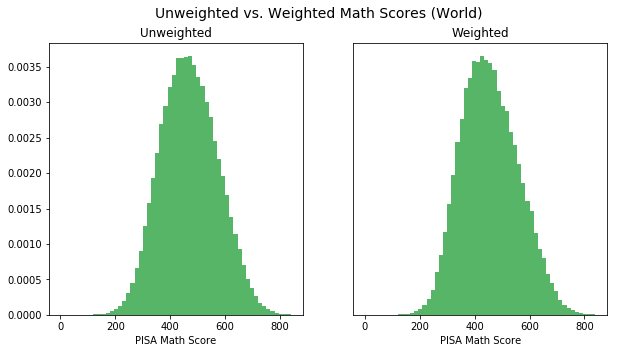

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(x='PV1MATH', data=interest_subset, bins=np.arange(0, 850, 15), density=True, color=world_color);
plt.title('Unweighted')
plt.xlabel('PISA Math Score')

plt.subplot(1,2,2)
plt.hist(x='PV1MATH', data=interest_subset, bins=np.arange(0, 850, 15),  density=True,color=world_color,
         weights=interest_subset.W_FSTUWT);
plt.title('Weighted')
plt.xlabel('PISA Math Score')
plt.yticks([])

plt.suptitle('Unweighted vs. Weighted Math Scores (World)', fontsize=14);
#plt.tight_layout()


The distribution of math scores seems more or less normally distributed with a slight right skew. The unweighted vs weighted distribution of math score data is pretty similar, though the weighted scores seem to show a slightly greater right skew.

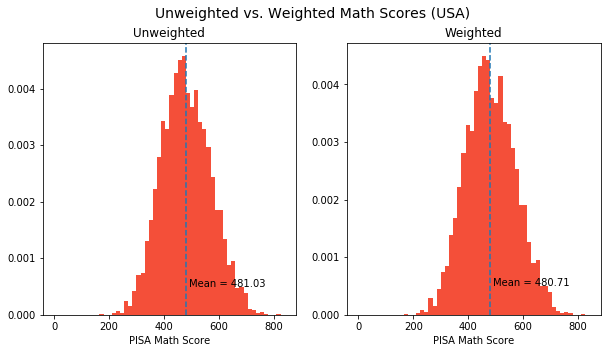

In [13]:
categorical_subset=df_usa.loc[:,'GRADE':'IC09Q06']
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(x='PV1MATH', data=df_usa, bins=np.arange(0, 850, 15), density=True, color=usa_color);
plt.axvline(df_usa.PV1MATH.mean(), linestyle='dashed')
plt.text(df_usa.PV1MATH.mean()+10, .0005, f'Mean = {str(df_usa.PV1MATH.mean())[:6]}')
plt.title('Unweighted')
plt.xlabel('PISA Math Score')

plt.subplot(1,2,2)
plt.hist(x='PV1MATH', data=df_usa, bins=np.arange(0, 850, 15),  density=True, color=usa_color,
         weights=df_usa.W_FSTUWT);
weighted_mean=(df_usa.PV1MATH*df_usa.W_FSTUWT).sum()/df_usa.W_FSTUWT.sum()
plt.axvline(weighted_mean, linestyle='dashed', label='Mean')

plt.text(weighted_mean+10, .0005, f'Mean = {str(weighted_mean)[:6]}')
plt.xlabel('PISA Math Score')
         
plt.title('Weighted')
#plt.yticks([])

plt.suptitle('Unweighted vs. Weighted Math Scores (USA)', fontsize=14);
#plt.tight_layout()


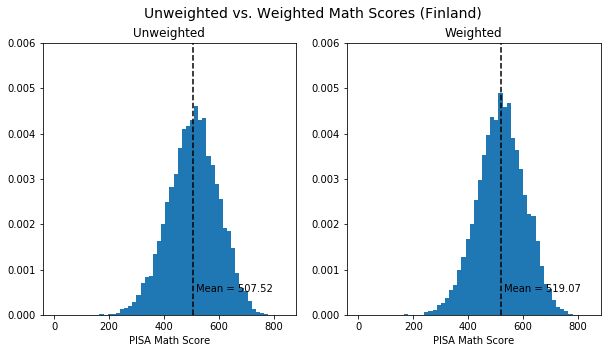

In [14]:
categorical_subset=df_finland.loc[:,'GRADE':'IC09Q06']
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(x='PV1MATH', data=df_finland, bins=np.arange(0, 850, 15), density=True, color=finland_color);
plt.axvline(df_finland.PV1MATH.mean(), linestyle='dashed', color='black')
plt.text(df_finland.PV1MATH.mean()+10, .0005, f'Mean = {str(df_finland.PV1MATH.mean())[:6]}')
plt.title('Unweighted')
plt.yticks(np.arange(0,.007,.001))
plt.xlabel('PISA Math Score')


plt.subplot(1,2,2)
plt.hist(x='PV1MATH', data=df_finland, bins=np.arange(0, 850, 15),  density=True, color=finland_color,
         weights=df_finland.W_FSTUWT);

weighted_mean=(df_finland.PV1MATH*df_finland.W_FSTUWT).sum()/df_finland.W_FSTUWT.sum()
plt.axvline(weighted_mean, linestyle='dashed', label='Mean', color='black')
plt.title('Weighted')
plt.text(weighted_mean+10, .0005, f'Mean = {str(weighted_mean)[:6]}')
plt.yticks(np.arange(0,.007,.001))
plt.xlabel('PISA Math Score')

plt.suptitle('Unweighted vs. Weighted Math Scores (Finland)', fontsize=14);
#plt.tight_layout()


There are some clear differences in the weighted plots vs the unweighted plots. Finland shows a thinner, smaller-deviation distribution and a significantly higher mean when properly weighted. Unfortunately, as I show later on, the process of accounting for weights becomes more daunting.

Next, I'm going to explore the distributions of some of the other numerical variables. Each of these has different missing values, so I will need to drop these as I plot them.


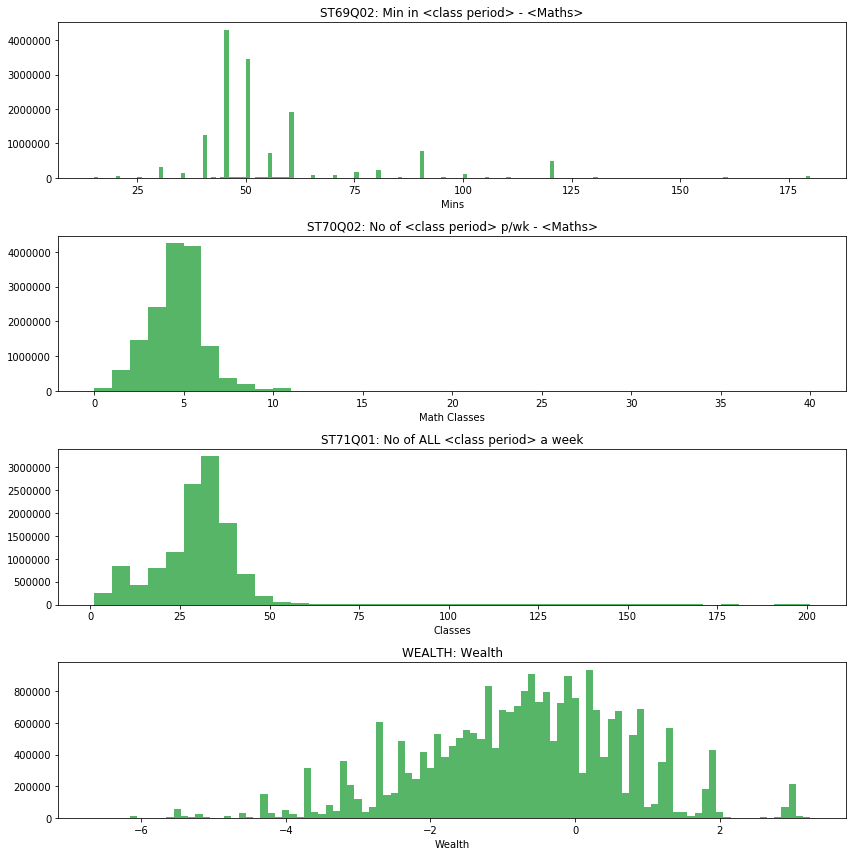

In [34]:
bin_sizes=[1, 1, 5, .1]
x_axes=['Mins','Math Classes', 'Classes' ,'Wealth']
j=1
plt.figure(figsize=(12,12))
for i in interest_subset.columns[end_categorical+1:-7]:
    plt.subplot(4,1,j)
    plt.hist(interest_subset[i], weights=interest_subset.W_FSTUWT, color=world_color,
             bins=np.arange(interest_subset[i].min(), interest_subset[i].max()+bin_sizes[j-1], bin_sizes[j-1]))
    plt.title(f"{i}: {df_key.T[i].values[0]}")
    plt.xlabel(x_axes[j-1])
    j+=1
plt.tight_layout()


- ST69Q02 seems very discrete and could probably be better summed up by a value_counts.

- Both ST70QO2 AND ST71Q01 have pretty extreme outliers, so those may be worth investigating further and possibly removing. Otherwise, they seem very roughly normally distributed.

- I'm actually not entirely sure of the units in the Wealth column. The helper dict is a little unclear and I can't find great info online, but a natural interpretation would be something like how many standard deviations above and below either a global average or the country's average. The exact details aren't super important, as lower numbers would clearly indicate less advataged and higher numbers would indicate privileged wealth status. The distribution definitely seems multimodal, likely representing discrete countries at similar wealth levels that PISA has tested. The general shape of the curve appears to have a large left skew.

And here's the top 20 weighted `value_counts()` for ST69Q02

In [35]:
print(df_key.T['ST69Q02'].values[0])
print(interest_subset.groupby('ST69Q02').sum()['W_FSTUWT'].astype(int).sort_values(ascending=False).head(20))

Min in <class period> - <Maths>
ST69Q02
45.0     4299939
50.0     3448040
60.0     1924374
40.0     1252987
90.0      778259
55.0      722501
120.0     490955
30.0      322299
80.0      235887
75.0      174876
35.0      139934
100.0     109318
70.0       92749
65.0       82678
180.0      67290
20.0       42368
85.0       39205
105.0      37943
42.0       35029
48.0       34077
Name: W_FSTUWT, dtype: int64


I'm also interested in one meta-variable, Math minutes per week, that I will calculate myself by multiplying number of math minutes per class and number of math classes per week.

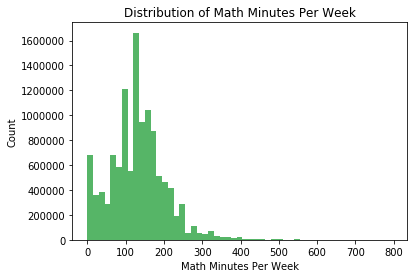

In [36]:
interest_subset['math_mins_wk']=interest_subset['ST70Q02']*interest_subset['ST71Q01']
plt.hist(x='math_mins_wk', data=interest_subset, bins=np.arange(0,800,15), color=world_color,
         weights='W_FSTUWT')
plt.title('Distribution of Math Minutes Per Week')
plt.xlabel('Math Minutes Per Week')
plt.ylabel('Count');

The meta-variable appears to have one main center with a good amount of right skew. This reveals perhaps a few outliers in the dataset that may have misunderstood either of the two questions. It would be possible, but very strange in my experience if a student was getting more than 10 hours of math education in a week.

In [37]:
#value counts for number of math minutes per week greater than 600
interest_subset[interest_subset['math_mins_wk']>600].math_mins_wk.value_counts()

660.0     100
605.0      62
770.0      41
720.0      24
880.0      23
684.0      20
624.0      20
1632.0     20
1053.0     19
672.0      17
800.0      17
715.0      16
1040.0     15
960.0      14
990.0      13
636.0      13
648.0      13
756.0      11
630.0      10
1360.0      9
742.0       9
840.0       8
650.0       8
696.0       7
620.0       6
640.0       5
810.0       5
1170.0      5
680.0       4
1420.0      4
         ... 
1066.0      1
702.0       1
768.0       1
775.0       1
1056.0      1
1232.0      1
708.0       1
637.0       1
1050.0      1
656.0       1
700.0       1
975.0       1
819.0       1
1225.0      1
845.0       1
764.0       1
741.0       1
1155.0      1
814.0       1
804.0       1
666.0       1
798.0       1
1185.0      1
665.0       1
812.0       1
1224.0      1
1080.0      1
1190.0      1
744.0       1
737.0       1
Name: math_mins_wk, Length: 81, dtype: int64

In [38]:
interest_subset[~interest_subset.math_mins_wk.isnull()].sort_values('math_mins_wk', ascending=True).tail(40)[['CNT', 'PV1MATH','math_mins_wk']]

,CNT,PV1MATH,math_mins_wk
97838,Switzerland,400.5375,1200.0
273187,Jordan,312.6733,1200.0
105499,Switzerland,466.8251,1224.0
318309,Mexico,282.9179,1225.0
100182,Switzerland,431.7729,1232.0
422845,Singapore,589.2740,1258.0
422862,Singapore,650.4985,1258.0
422874,Singapore,554.8450,1360.0
422869,Singapore,609.9938,1360.0
425250,Singapore,684.8497,1360.0


Well, actually, there seem to be pretty regular things happening in Singapore with lots of math minutes per week. These students also seem to do very well on the math test with scores well above the mean. Once the country changes over to Switzerland, these are probably outliers with incorrect responses. Somewhat unsurprisingly, these students have math scores well below the mean!

I'll remove these highest points to discard these likely errors.

In [39]:
interest_subset=interest_subset[~(interest_subset.math_mins_wk>1632)]

And redefine my two country sub-dataframes:

In [40]:
df_usa=interest_subset[interest_subset.CNT=='United States of America'].copy()
df_finland=interest_subset[interest_subset.CNT=='Finland'].copy()

Next, I'll explore the distribution of categorical variables. Later, in the bivariate stage, I'll see how the distribution of responses to these questions break down in the US and Finland compared to these World values

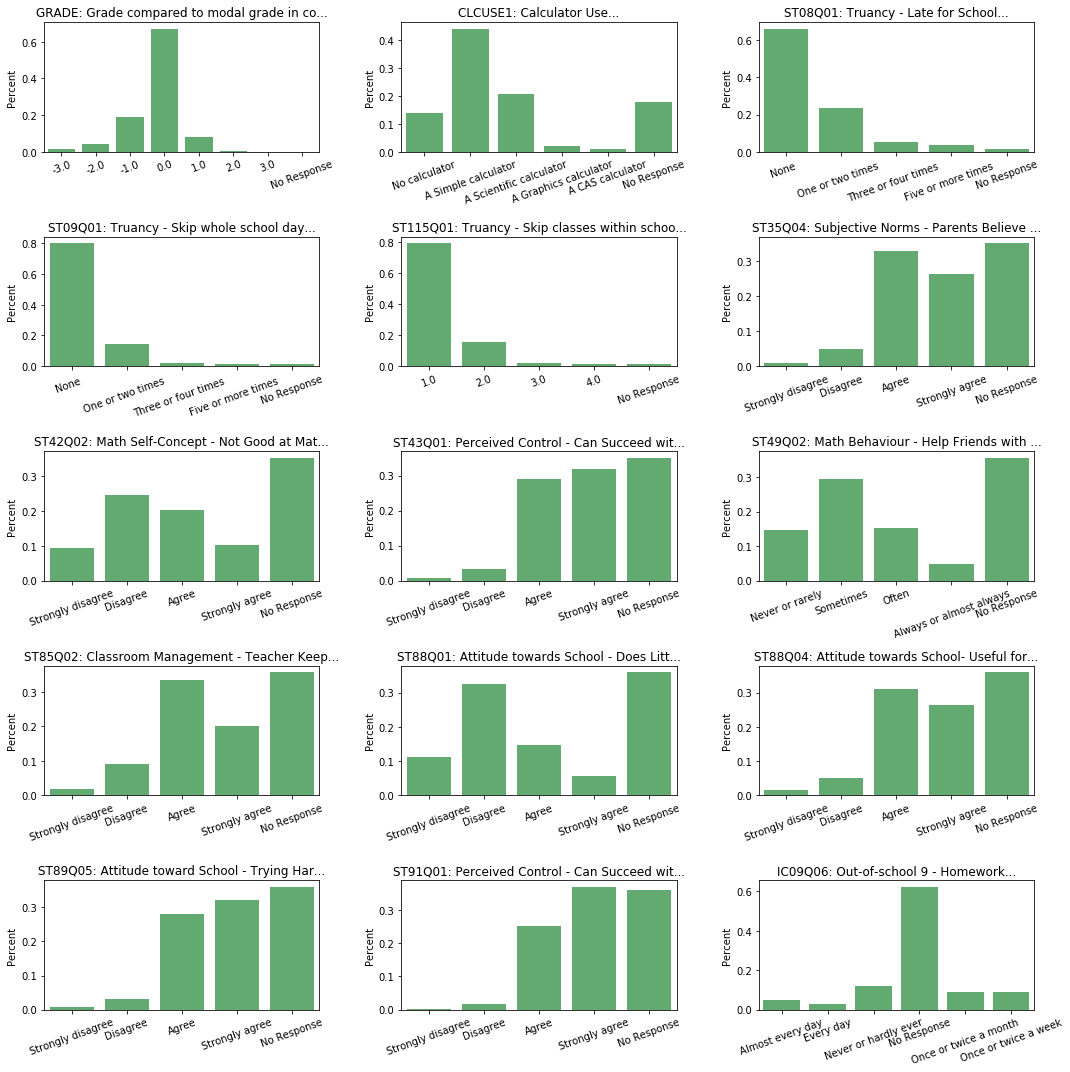

In [41]:
end_categorical=list(df_usa.columns).index('IC09Q06')
plt.figure(figsize=(15,15))
for i in range(end_categorical):

    plt.subplot(5,3,i+1)
    current=interest_subset.columns[i+1]
    world_wt=interest_subset[~interest_subset[current].isnull()].W_FSTUWT.sum() #remove null values
    world=(interest_subset.groupby(current).sum()/world_wt).reset_index()#weight data
    world['CNT']='World'
    sb.barplot(x=current, y='W_FSTUWT', data=world, color=world_color)
    
    plt.xticks(rotation=20)
    plt.xlabel('')
    plt.ylabel('Percent')
    #plt.legend(title='')
    plt.title('{}: {}...'.format(current,df_key.T[current].values[0][:35]))
plt.tight_layout()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of my numerical variables were roughly normally distributed. I created a meta-variable to check for number of math minutes per week and found a few outliers that way. Another interesting point is that the "No Response" value I inserted as a replacement for NaN has a significant amount of the data in some of the questions. This will be interesting to see if there are any correlations with "No Response." It makes the philosophical point that "No Response" is indeed a response.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I decided to throw out a few outlier rows that were pretty clearly mistakes in terms of the students explaining the number of math minutes per week.

## Bivariate Exploration

> I would like to note that in this phase, attempting to correctly use the weights in bivariate visualizations became too cumbersome and time-consuming. I was advised on the Udacity Knowledge cetner to focus on coding great visualizations rather than worrying too much about the weighting of each row, even though this will unfortunately create misleading visuals. I will note from now on only if I DID properly weight the visual, as some of these were created before I sought help on the topic.

First of all, I'd like to understand the Wealth variable a little better, so I am curious how it breaks down by country.

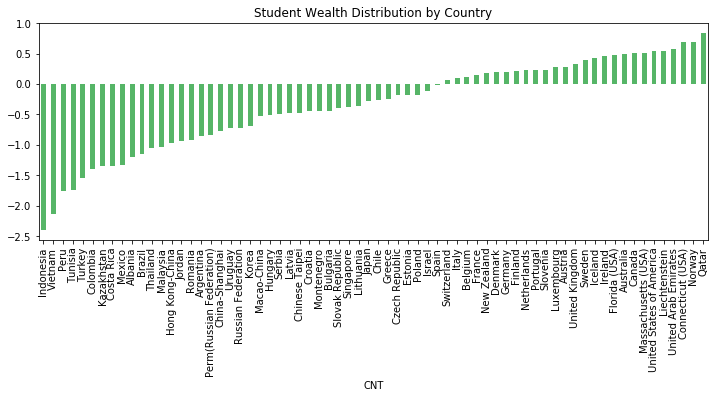

In [42]:
interest_subset.groupby('CNT').mean().WEALTH.sort_values(ascending=True).plot(kind='bar', 
                                                                              figsize=(12,4), 
                                                                              title='Student Wealth Distribution by Country',
                                                                              color=world_color);

The wealth variable does seem to be measuring something of a more global scale, as traditionally richer countries plot higher averages. Good to know.

I wonder how the wealth variable correlates with any of the categorical variables?

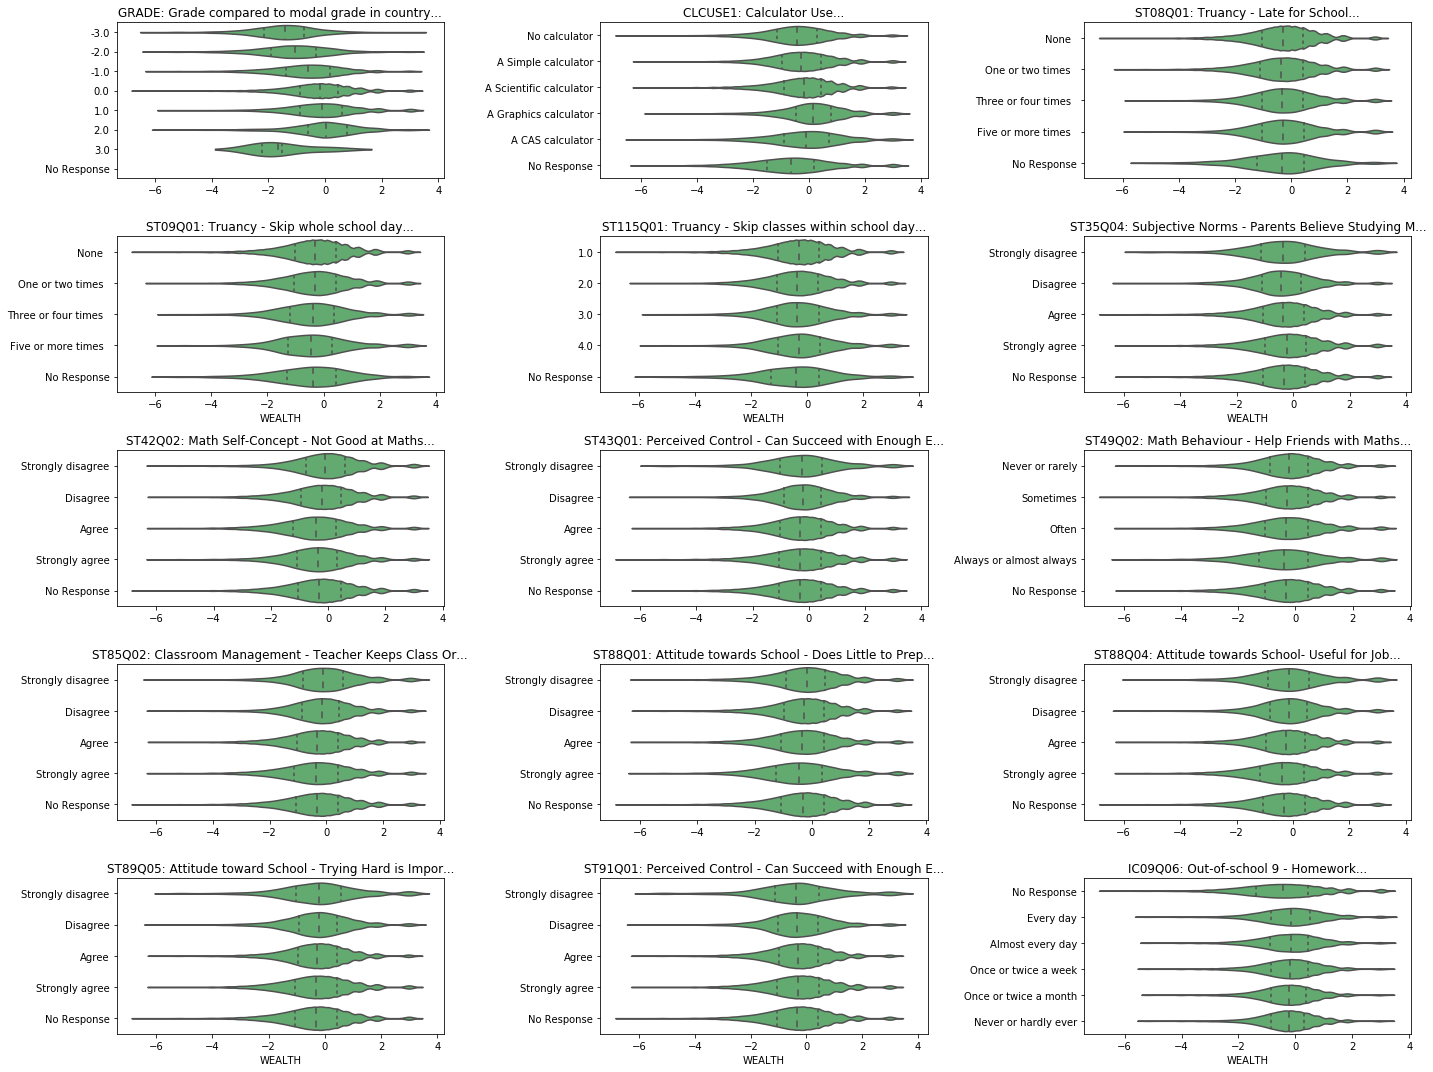

In [43]:
wealth_categorical=interest_subset[~interest_subset.WEALTH.isnull()]
j=0
plt.figure(figsize=(20,15))
for i in range(end_categorical):

    plt.subplot(5, 3, i+1)
    current=wealth_categorical.columns[i+1]
    sb.violinplot(data=wealth_categorical, y=wealth_categorical[current],
                  x=wealth_categorical.WEALTH,inner='quartile', color=world_color)
    plt.title('{}: {}...'.format(current,df_key.T[current].values[0][:45]))
    plt.ylabel('')
    if i not in [3,4,5,12,13,14]:#choose some plots to remove the x label, since it is shared among all the facets
        plt.xlabel('')
    
plt.tight_layout()

    

This one was really interesting. Apparently very few of these categorical topics I selected make much of a difference on the distribution of Wealth, but a few indeed stood out as important relationships. 
- (GRADE) Grade in school has a very clear correlation with wealth - kids who have been held back appear to have significantly lower wealth than kids who are pushed ahead a grade. 
- (CLCUSE1) Calculator use also seems to be correlated with wealth - students who are wealthy use graphing calculators more than other categories (or visa versa!)
- (ST88Q01) More slight, but still visible - students who "strongly agree" that school does nothing to help prepare for life them have lower wealth distributions
- (ST42Q02) Another slight affect - students who "agree" that they're "not good at maths" have a lower wealth distribution, whereas those who "strongly disagree" have a higher wealth distribution
- (ST35Q04) Finally, students who "strongly agree" that their parents believe studying math is important have a higher wealth distribution than the other responses

Since wealth is clearly a big factor in this dataset, I would like to quickly plot wealth distributions in the USA vs Finland.

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


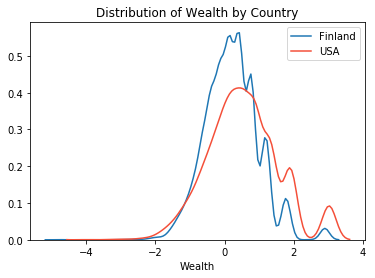

In [44]:

ax=sb.kdeplot(df_finland["WEALTH"], color=finland_color)
sb.kdeplot(df_usa["WEALTH"], ax=ax, color=usa_color)
ax.legend(labels=['Finland','USA']);
ax.set_title('Distribution of Wealth by Country')
ax.set_xlabel('Wealth');

The main difference I can see is that the US wealth distribution has really big pockets on the upper end of the Wealth axis. Finland's distribution is much more centered around the country's mean. This is something I would expect, knowing the issues with wealth inequality the US is facing in modern days. Also, the social safety nets Finland has in place to help alleviate poverty manifests in a very steep dropoff in on the left of Finland's distribution.

Next, a cohesive look into how the math score distributions compare between the World, the US and Finland. Here are the three (properly weighted) math score distributions side by side for comparison:

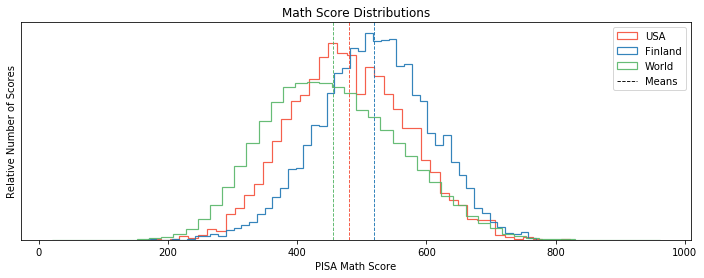

In [45]:
fig,ax=plt.subplots(figsize=(12,4))
#usa dist
sb.distplot(df_usa['PV1MATH'], kde=False, ax=ax, label="USA", color=usa_color, 
            hist_kws={'weights':df_usa['W_FSTUWT'].values, 
                      'histtype':"step", 
                      'density':True});
#usa mean line
usa_mean_math=(df_usa['PV1MATH']*df_usa['W_FSTUWT']).sum()/df_usa['W_FSTUWT'].sum()
plt.axvline(usa_mean_math, linestyle='dashed',color=usa_color, linewidth=.9)

#finland dist
sb.distplot(df_finland['PV1MATH'], kde=False, ax=ax, label="Finland", color=finland_color,
            hist_kws={'weights':df_finland['W_FSTUWT'].values, 
                      'histtype':"step",
                      'density':True});
#finland mean line
fin_mean_math=(df_finland['PV1MATH']*df_finland['W_FSTUWT']).sum()/df_finland['W_FSTUWT'].sum()
plt.axvline(fin_mean_math, linestyle='dashed',color=finland_color, linewidth=.9)

#world dist
sb.distplot(interest_subset['PV1MATH'], kde=False, ax=ax, label="World", color=world_color,
            hist_kws={'weights':interest_subset['W_FSTUWT'].values, 
                      'histtype':"step", 
                      'density':True})
#world mean line
world_mean_math=(interest_subset['PV1MATH']*interest_subset['W_FSTUWT']).sum()/interest_subset['W_FSTUWT'].sum()
plt.axvline(world_mean_math, linestyle='dashed',color=world_color, linewidth=.9)

plt.setp(ax.patches, linewidth=1.2, alpha=.9)#change linewidths of the step type histograms, which are of type patch, not type line!
my_legend=plt.legend()

legend_elements = my_legend.get_patches()+[plt.Line2D([0],[0],color='black', linewidth=.9, linestyle='dashed')]#get current elements and add the black dashed line
legend_labels = ['USA','Finland','World','Means']
plt.legend(legend_elements,legend_labels)
plt.xlabel('PISA Math Score')
plt.ylabel('Relative Number of Scores')
plt.yticks([])
plt.title("Math Score Distributions");
#plt.hist()

Both the US and Finland have a greater average than the world mean, but Finland beats US by a good margin. This is in line with articles I have read about the education system in Finland.

Next I'd like to explore how the categorical responses break down by country.

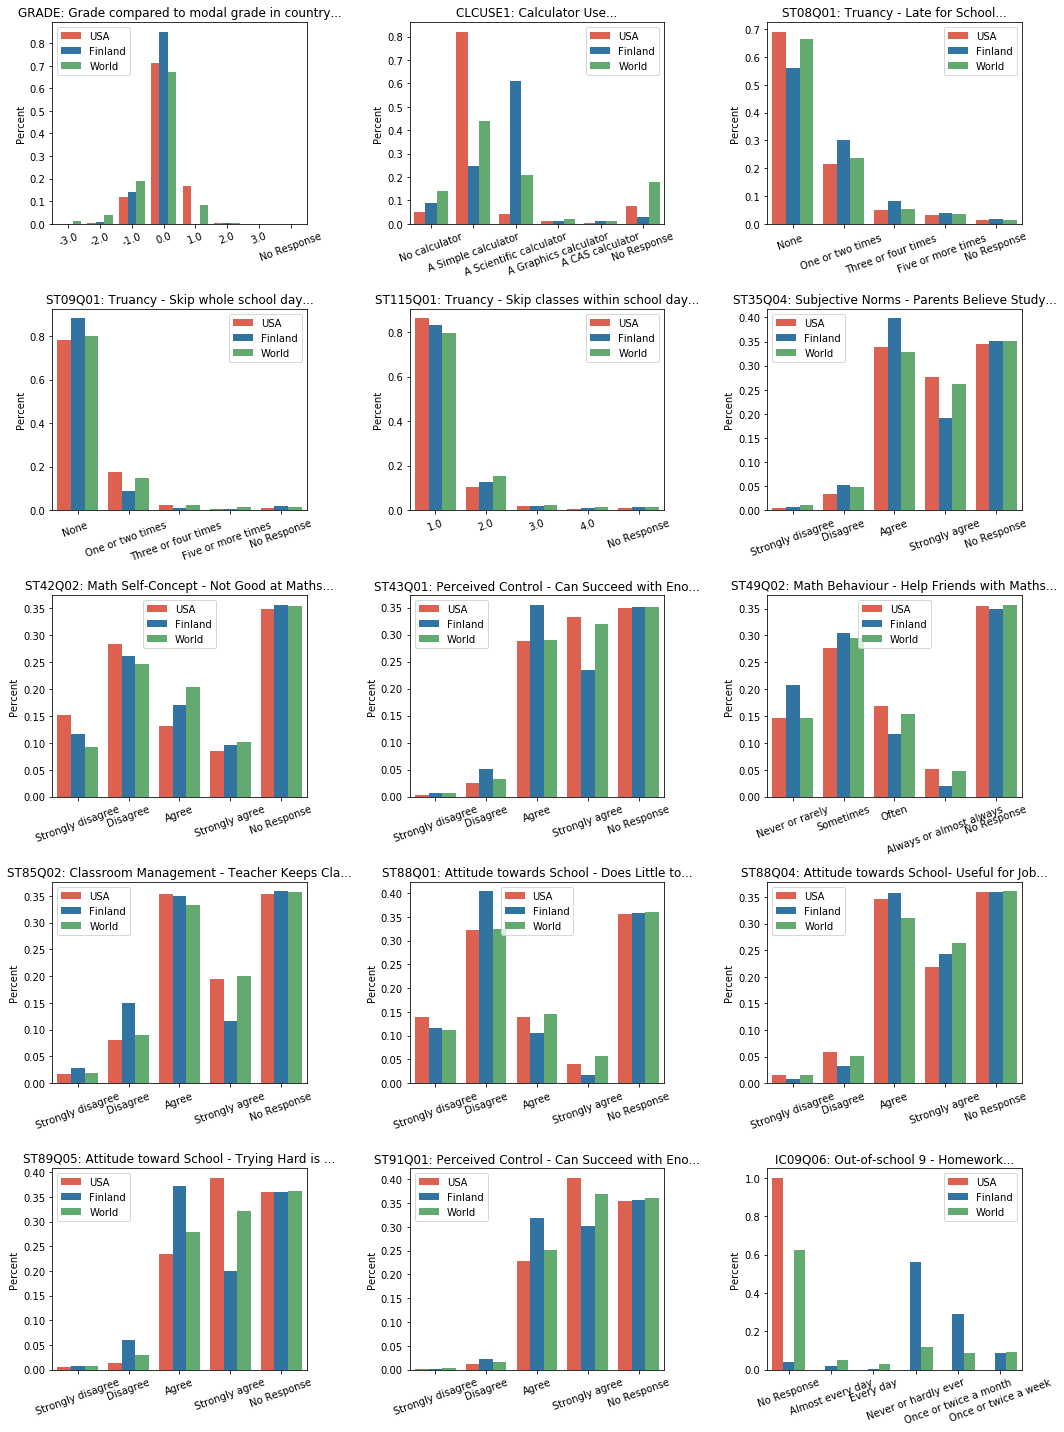

In [46]:
usa_color=sb.color_palette('Reds')[3]
finland_color=sb.color_palette()[0]
world_color=sb.color_palette('Greens')[3]
end_categorical=list(df_usa.columns).index('IC09Q06')
plt.figure(figsize=(15,20))
for i in range(end_categorical):
    plt.subplot(5,3,i+1)
    current=df_usa.columns[i+1]
    usa_wt=df_usa[~df_usa[current].isnull()].W_FSTUWT.sum()
    usa=(df_usa.groupby(['CNT',current]).sum()/usa_wt).reset_index()
    usa.CNT='USA'
    fin_wt=df_finland[~df_finland[current].isnull()].W_FSTUWT.sum()
    fin=(df_finland.groupby(['CNT',current]).sum()/fin_wt).reset_index()
    world_wt=interest_subset[~interest_subset[current].isnull()].W_FSTUWT.sum()
    world=(interest_subset.groupby(current).sum()/world_wt).reset_index()
    world['CNT']='World'
    both=pd.concat([usa,fin,world], sort=False)
    sb.barplot(x=current, y='W_FSTUWT', data=both, hue="CNT", palette={'USA':usa_color,
                                                                          'Finland':finland_color,
                                                                          'World':world_color})
    plt.xticks(rotation=20)
    plt.xlabel('')
    plt.ylabel('Percent')
    plt.legend(title='')
    plt.title('{}: {}...'.format(current,df_key.T[current].values[0][:40]))
plt.tight_layout()

Distributions between students in the USA and Finland seem pretty similar, however, Finland tends to shy away from "strongly" agreeing or disagreeing. Perhaps this is a culture difference. One interesting difference is that fewer students in the USA 'Agree' that they are "Not good at maths.' Also, calculator use is pretty significantly different between the two countries. Finland clearly shys away from moving students up a grade, opting to keep them at grade level or hold them back. This is something I know is true about the educational philosophy in Finland - they focus on differentiation within different student abilities and keeping age levels together (the opposite of "tracking" as many other countries do). Also, Finland gets way less HW than the rest of the world according to the last graph!

Next I'm curious how instructional minutes per week varies with math achievement. 

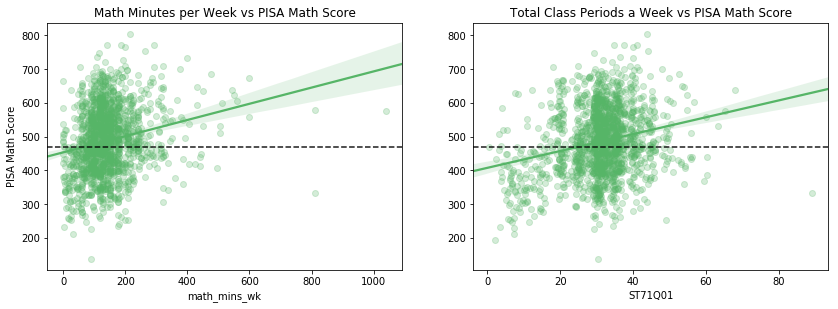

In [47]:
plt.figure(figsize=(14,10))
sample=interest_subset.sample(3000)
sample_mean=sample.PV1MATH.mean()
plt.subplot(2,2,1)
sb.regplot(x='math_mins_wk', y='PV1MATH', data=sample, scatter_kws={'alpha':.25}, color=world_color)
plt.ylabel('PISA Math Score')
plt.axhline(y=sample_mean, linestyle='dashed', color='black', alpha=.9)

plt.title('Math Minutes per Week vs PISA Math Score')

plt.subplot(2,2,2)
sb.regplot(x='ST71Q01', y='PV1MATH', data=sample, x_jitter=1, scatter_kws={'alpha':.25,}, color=world_color)
plt.axhline(y=sample_mean, linestyle='dashed', color='black', alpha=.9)
plt.title('Total Class Periods a Week vs PISA Math Score')
plt.ylabel('');



There appears to be (weak) positive correlation between number of math minutes in a week and math score, as well as between number of class periods per week and math score.

Finally, the moment we've all been waiting for. Wealth vs. Math score - any correlation?


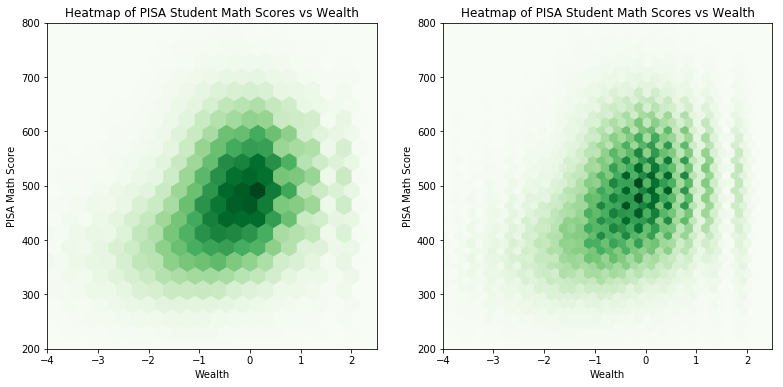

In [48]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.ylim([200,800])
plt.xlim([-4,2.5])

plt.hexbin(x='WEALTH',y='PV1MATH', data=interest_subset[~interest_subset.WEALTH.isnull()],
           cmap=plt.cm.Greens, gridsize=32)
plt.title('Heatmap of PISA Student Math Scores vs Wealth')

plt.xlabel('Wealth')
plt.ylabel('PISA Math Score')


plt.subplot(1,2,2)
plt.ylim([200,800])
plt.xlim([-4,2.5])

plt.hexbin(x='WEALTH',y='PV1MATH', data=interest_subset[~interest_subset.WEALTH.isnull()],
           cmap=plt.cm.Greens, gridsize=60)
plt.title('Heatmap of PISA Student Math Scores vs Wealth')

plt.xlabel('Wealth')
plt.ylabel('PISA Math Score');

The heatmap above is definitely oblong, pointing diagonally, demonstrating some kind of positive correlation between student wealth and math score. I tried out a few bin sizes to make sure I wasn't observing any artifacts.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There were some important features I parsed out above, including: positive correlations between GRADE and Wealth; demonstrating the math score distributions of Finland vs the US and the World; observing a cultural difference in Finland to avoid the extreme "strongly {disagree/agree}" categories and opting for the Agree/Disagree most often. We also revealed a slight positive correlation betwen Wealth and Math score, which I hope to investigate further in the Multivariate stage.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was definitely interesting to find some unexpected relationships bewteen the categorical variables and wealth. Another interesting observation is that a very similar proportion of people gave "No Response" from the USA, Finland, and the World. It may point to a more universal personality type that leaves survey questions blank. Or perhaps a feature in the test collection process where some questions were left off in some consistent way and that's why there's no answer.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

First of all, I am curious to explore the relationship between a few of the variables that jumped out in the bivariate exploration: Wealth, grade, and achievement.

In [49]:
interest_subset_remove_cats=interest_subset[~((interest_subset.GRADE=='3.0')|(interest_subset.GRADE=='No Response'))].copy()

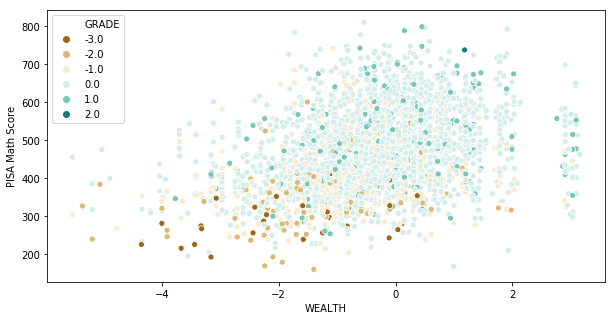

In [50]:
interest_subset_remove_cats.GRADE=interest_subset_remove_cats.GRADE.cat.remove_unused_categories()

plt.figure(figsize=(10,5))
sb.scatterplot(data=interest_subset_remove_cats.sample(3000),
            x='WEALTH', y='PV1MATH', hue='GRADE', palette=sb.color_palette('BrBG'))
plt.ylabel('PISA Math Score');

Here's a Faceted look at the plot above:

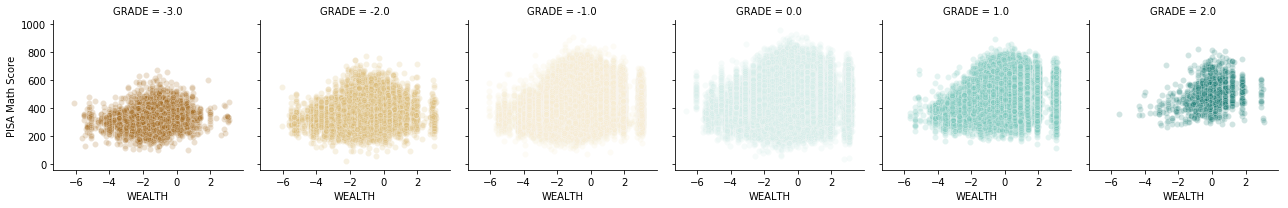

In [51]:
interest_subset_remove_cats.GRADE=interest_subset_remove_cats.GRADE.cat.remove_unused_categories()
g=sb.FacetGrid(data=interest_subset_remove_cats,
                col='GRADE', hue='GRADE', 
                palette=sb.color_palette('BrBG',interest_subset.GRADE.nunique()-1), 
                col_wrap=6)
g.map(sb.scatterplot, 'WEALTH', 'PV1MATH',alpha=.2,)
g.axes[0].set_ylabel('PISA Math Score');


The wealth and achievement of students held back 2 or 3 grades is shown strongly in the facets moving from left to right. There is a clear trend of the data moving up and to the right as the grade is raised. This suggests that students who are pushed up two grades are generally richer and better performing than the general population. This general trend can be observed in the first graph as well.

The following was an attempt to make an accurately weighted dodged point plot (including using all 5 plausible values according to how PISA said proper analysis should be done with their student achievement data) comparing each of the categorical variables, and the mean math score for two different countries - Finland and the USA. I got the means working, but plotting the standard deviations I calculated for each point as error bars was what ultimately got me thinking I need to focus on creating good visuals and stop banging my head against the wall working with weighted data.

In [52]:
weights=df_usa.W_FSTUWT

for scores in df_usa.columns[-5:]:
    df_usa['weighted_'+scores]=df_usa[scores]*weights


In [53]:
pvlist=['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH']
weights=df_usa.W_FSTUWT
#first multply all of pvlist by their weights to make the weighted scores
for scores in pvlist:
    df_usa['weighted_'+scores]=df_usa[scores]*weights

df_weighted_cats=pd.DataFrame({})
#calculates weighted means for each of pvlist, then averages final result into a final mean
#score for each category
for i in range(end_categorical-1):
    next_att=df_usa.columns[i+1]
    grouped_weighted=df_usa.groupby(next_att).sum().reset_index()
    grouped_weighted=grouped_weighted.rename({next_att:"response"}, axis=1)
    grouped_weighted.loc[:,'category']=next_att
    for j in pvlist:
        grouped_weighted.loc[:,'weighted_'+j]=grouped_weighted['weighted_'+j]/grouped_weighted.W_FSTUWT
    grouped_weighted.loc[:,'mean_score']=grouped_weighted.apply(lambda row: row[['weighted_'+score for score in pvlist]].mean(), axis=1)
    df_weighted_cats=df_weighted_cats.append(grouped_weighted[['category','response','mean_score']],ignore_index=True)
df_weighted_cats=df_weighted_cats.set_index(['category','response'])

#calculates weighted standard deviation and stores into the df_weighted_cats dataframe
df_weighted_cats.loc[:,'std_dev']=0.0
for i in range(end_categorical-1):
    next_cat=df_usa.columns[i+1]
    df_usa.loc[:,'difference_'+next_cat]=df_usa.apply(lambda row: row['PV1MATH']-df_weighted_cats.mean_score[next_cat, row[next_cat]], axis=1)
    df_usa.loc[:,'difference_'+next_cat]=(df_usa['difference_'+next_cat]**2)*weights
for i in range(end_categorical-1):
    next_cat=df_usa.columns[i+1]
    grouped_weighted=df_usa.groupby(next_cat).sum().reset_index()
    grouped_weighted=grouped_weighted.rename({next_cat:"response"}, axis=1)
    grouped_weighted.loc[:,'category']=next_cat
    grouped_weighted.loc[:,'std_dev']=np.sqrt(grouped_weighted['difference_'+next_cat]/grouped_weighted.W_FSTUWT)
    df_weighted_cats['std_dev'].loc[next_cat,:]=grouped_weighted['std_dev'].values
#df_weighted_cats.fillna(0)


In [54]:
pvlist=['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH']
weights=df_finland.W_FSTUWT
#first multply all of pvlist by their weights to make the weighted scores
for scores in pvlist:
    df_finland['weighted_'+scores]=df_finland[scores]*weights

df_weighted_cats_finland=pd.DataFrame({})
#calculates weighted means for each of pvlist, then averages final result into a final mean
#score for each category
for i in range(end_categorical-1):
    next_att=df_finland.columns[i+1]
    grouped_weighted=df_finland.groupby(next_att).sum().reset_index()
    grouped_weighted=grouped_weighted.rename({next_att:"response"}, axis=1)
    grouped_weighted.loc[:,'category']=next_att
    for j in pvlist:
        grouped_weighted.loc[:,'weighted_'+j]=grouped_weighted['weighted_'+j]/grouped_weighted.W_FSTUWT
    grouped_weighted.loc[:,'mean_score']=grouped_weighted.apply(lambda row: row[['weighted_'+score for score in pvlist]].mean(), axis=1)
    df_weighted_cats_finland=df_weighted_cats_finland.append(grouped_weighted[['category','response','mean_score']],ignore_index=True)
df_weighted_cats_finland=df_weighted_cats_finland.set_index(['category','response'])

#calculates weighted standard deviation and stores into the df_weighted_cats_finland dataframe
df_weighted_cats_finland.loc[:,'std_dev']=0.0
for i in range(end_categorical-1):
    next_cat=df_finland.columns[i+1]
    df_finland.loc[:,'difference_'+next_cat]=df_finland.apply(lambda row: row['PV1MATH']-df_weighted_cats_finland.mean_score[next_cat, row[next_cat]], axis=1)
    df_finland.loc[:,'difference_'+next_cat]=(df_finland['difference_'+next_cat]**2)*weights
for i in range(end_categorical-1):
    next_cat=df_finland.columns[i+1]
    grouped_weighted=df_finland.groupby(next_cat).sum().reset_index()
    grouped_weighted=grouped_weighted.rename({next_cat:"response"}, axis=1)
    grouped_weighted.loc[:,'category']=next_cat
    grouped_weighted.loc[:,'std_dev']=np.sqrt(grouped_weighted['difference_'+next_cat]/grouped_weighted.W_FSTUWT)
    df_weighted_cats_finland['std_dev'].loc[next_cat,:]=grouped_weighted['std_dev'].values
df_weighted_cats_finland.loc[:,'CNT']="Finland"
#df_weighted_cats_finland[['mean_score','std_dev']].loc[("GRADE",1.0)]=0
#df_weighted_cats_finland.fillna(0)
df_weighted_cats.loc[:,'CNT']="USA"


In [55]:
cat_means=pd.merge(df_weighted_cats.reset_index(),df_weighted_cats_finland.reset_index(), how='outer', left_index=False, right_index=False)
cat_means.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 5 columns):
category      148 non-null object
response      148 non-null object
mean_score    141 non-null float64
std_dev       141 non-null float64
CNT           148 non-null object
dtypes: float64(2), object(3)
memory usage: 6.9+ KB


In [56]:
cat_means=cat_means.sort_values(['category','response'],axis=0,ascending=False).set_index(['category','response','CNT']).fillna(0).reset_index()


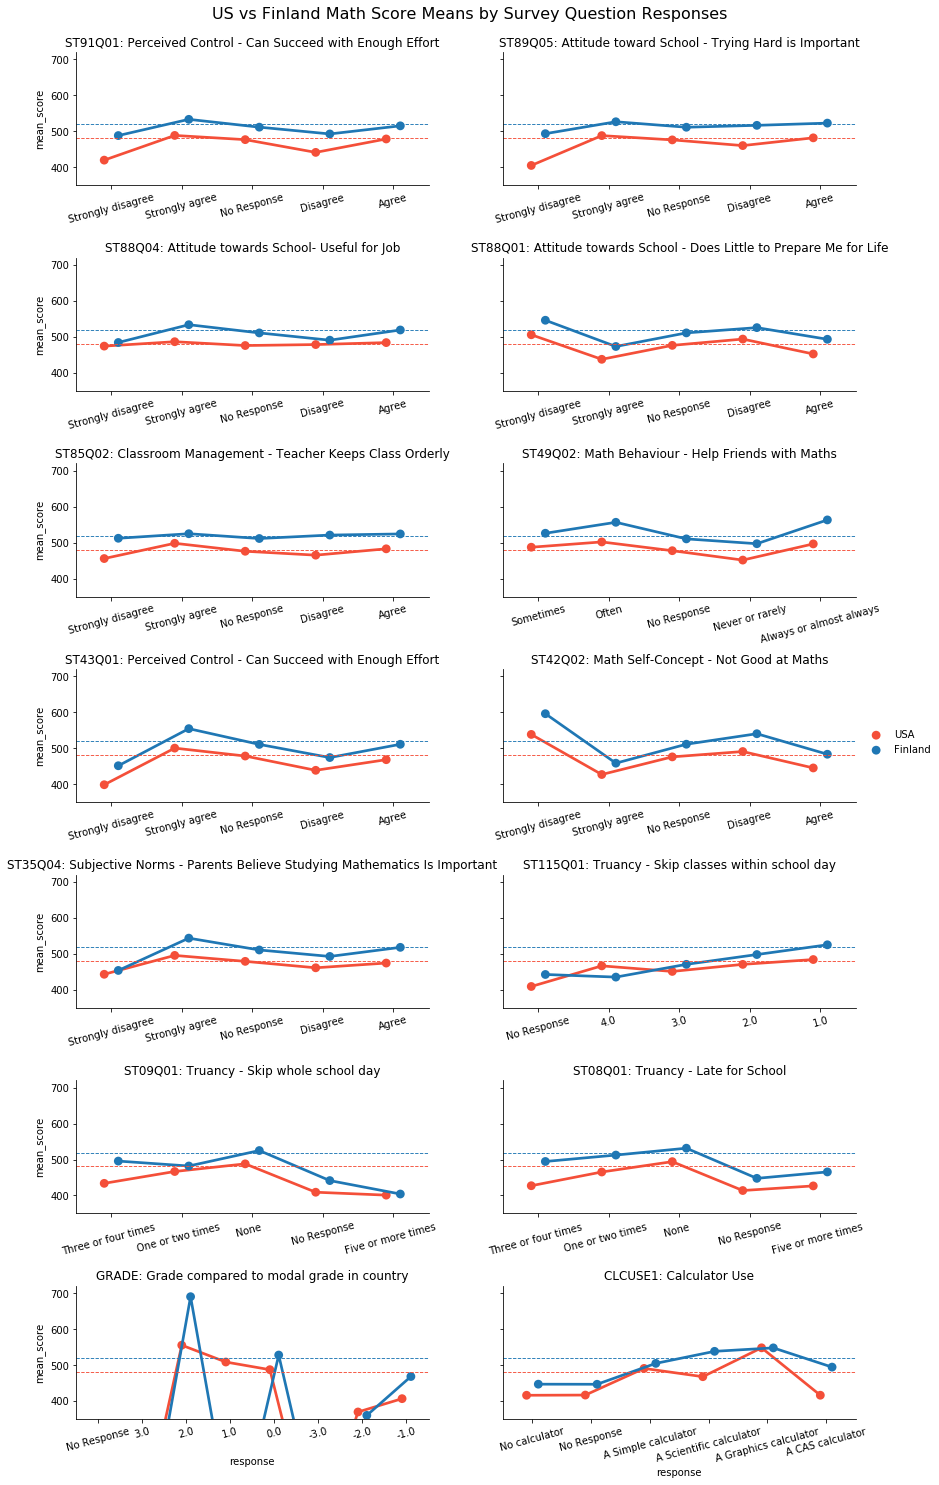

In [57]:
def pointplot(x,y,hue,**kwargs):
    sb.pointplot(x=x,y=y,hue=hue,**kwargs)
def errorbar(x,y,yerr,**kwargs):
    plt.errorbar(x=x,y=y,yerr=yerr,hue=hue,**kwargs)
g=sb.FacetGrid(data=cat_means, col='category',aspect=2, 
               col_wrap=2, sharex=False, sharey=True,
               ylim=(200,750),
              );
ax=g.map(pointplot, 'response', 'mean_score', 'CNT',palette={'USA':usa_color,'Finland':finland_color}, 
         dodge=0.2, linestyles='-', xerr='std_dev') #sb.pointplot()

#plt.axhline(fin_mean_math, linestyle='dashed', color=finland_color, linewidth=.9)

for ax in g.axes.flat:
    labels=ax.get_xticklabels()
    title=ax.get_title().replace('category = ', '')
    ax.set_xticklabels(labels,rotation=15)
    ax.set_title(f'{title}: {df_key.T[title].values[0]}')
    ax.set_ylim([350,720])
    ax.axhline(fin_mean_math, linestyle='dashed', color=finland_color, linewidth=.9)
    ax.axhline(usa_mean_math, linestyle='dashed', color=usa_color, linewidth=.9)

plt.tight_layout()
g.fig.suptitle("US vs Finland Math Score Means by Survey Question Responses", size=16)
g.fig.subplots_adjust(top=.95)
g.add_legend()

#g.map(plt.errorbar, 'response','mean_score','std_dev',hue='CNT',palette={'USA':usa_color,'Finland':finland_color}, fmt='none',dodge=.2) #plt.errorbar()

This facted set of point plots is very illuminating for me in terms of my big driving question - what is different in Finland than in the USA? In general, the responses to my set of survey questions affects the math score mean in similar ways in the two countries, but the parts where the slopes are different each demonstrate a few fascinating insights. For example, when Americans "Strongly Disagree" that trying hard is important, it has a much stronger negative pull on the mean than in Finland. In Finland, skipping 4 class periods in the day really hurts the group mean, but the US experiences some benefit! When students in Finland are moved up two grades, the group mean soars; it does in the US too, but with much less gusto. Anyway, I love this plot. It could just be that I worked SO hard for it, but I think it's pretty fascinating. It's important to remember, however, that without the error bars, it's not possible to tell how meaningful these means are.

Lastly, I'm curious to investigate weekly math minutes vs student acheivement in my two countries of choice, USA and Finland.

In [58]:
df_usa.loc[:,'CNT']='USA'

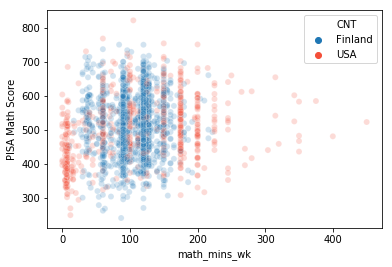

In [59]:
sb.scatterplot(data=pd.concat([df_usa,df_finland], sort=False).sample(4000), x='math_mins_wk', y='PV1MATH',hue='CNT',
               x_jitter=1.1,palette={'USA':usa_color, 'Finland':finland_color},
               alpha=.2)
plt.ylabel('PISA Math Score');

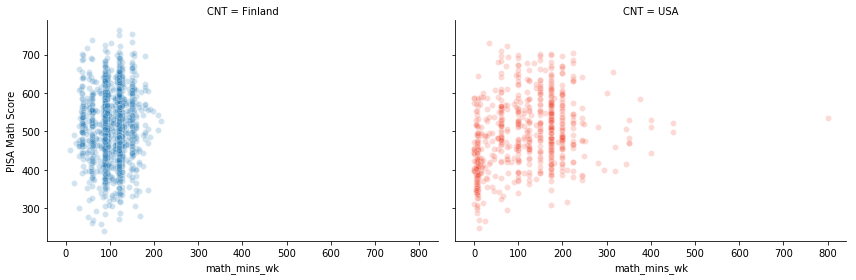

In [60]:

g=sb.FacetGrid(data=pd.concat([df_usa,df_finland],sort=False).sample(4000),col='CNT', 
               hue='CNT', palette={'USA':usa_color, 'Finland':finland_color}, height=4,aspect=1.5)

g.map(sb.scatterplot, 'math_mins_wk', 'PV1MATH', x_jitter=10, alpha=.2)
g.axes[0,0].set_ylabel('PISA Math Score');


Finland doesn't appear to demonstrate a correlation between math minutes in a week and math achievement, as it has a much narrower distribution of math minutes. The US seems to have a slight correlation, but this might simply be due to how many students are near 0 math minutes, and this clump of students is clearly performing worse than the rest.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I mentioned a lot above about the different categorical variables' apparent affect on achievement in the US and Finland. One other thing I didn't mention was that students who skip school 3 or 4 times did much better in Finland, while students  who skipped 5 or more times did poorly in both the US and Finland. One of the strongest relationships I have found is the positive correlation between wealth, Grade level, and achievement. This makes me imagine rich families who pay for private tutoring early and get their child ahead, which ends up benefitting them in their math ability.

### Were there any interesting or surprising interactions between features?

> It was very interesting to observe the lack of positive correlation between math minutes and achievement in Finland in the final graph. This positive correlation appears to exist in the US primariy because there are so many 15 year olds who are not taking any math classes! If those points were simply moved right on the graph (i.e., placed in an average math class), there would not be such a strong Positive correlation between math minutes and achievement. The US has a greater diversity of math minutes per week, but Finland remains the better achiever on average.